In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
import os
from itertools import product
from datetime import datetime
from dateutil.parser import parse
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [4]:
df = pd.read_csv('bitcoin.csv')

In [5]:
df.head()

,Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1674347340000,2023-01-22 00:29:00,BTC/USD,22945.48,22945.48,22945.48,22945.48,0.000000,0.000000
1,1674347280000,2023-01-22 00:28:00,BTC/USD,22931.42,22969.00,22931.42,22945.48,0.296535,6804.144107
2,1674347220000,2023-01-22 00:27:00,BTC/USD,22919.01,22931.42,22919.01,22931.42,0.004038,92.589277
3,1674347160000,2023-01-22 00:26:00,BTC/USD,22907.48,22921.28,22907.48,22919.01,0.752407,17244.430433
4,1674347100000,2023-01-22 00:25:00,BTC/USD,22886.55,22907.48,22886.55,22907.48,0.004373,100.176243


In [6]:
df.index = df.Date.apply(lambda x : parse(x))
df.head()

,Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,,,
2023-01-22 00:29:00,1674347340000,2023-01-22 00:29:00,BTC/USD,22945.48,22945.48,22945.48,22945.48,0.000000,0.000000
2023-01-22 00:28:00,1674347280000,2023-01-22 00:28:00,BTC/USD,22931.42,22969.00,22931.42,22945.48,0.296535,6804.144107
2023-01-22 00:27:00,1674347220000,2023-01-22 00:27:00,BTC/USD,22919.01,22931.42,22919.01,22931.42,0.004038,92.589277
2023-01-22 00:26:00,1674347160000,2023-01-22 00:26:00,BTC/USD,22907.48,22921.28,22907.48,22919.01,0.752407,17244.430433
2023-01-22 00:25:00,1674347100000,2023-01-22 00:25:00,BTC/USD,22886.55,22907.48,22886.55,22907.48,0.004373,100.176243


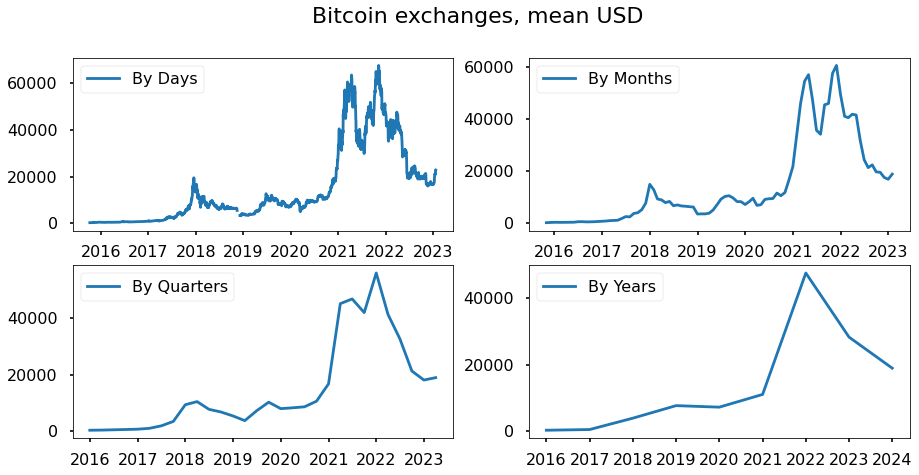

In [7]:
# Unix-time to 
# df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
# df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Open, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Open, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Open, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Open, '-', label='By Years')
plt.legend()
plt.show()

In [8]:
df_month

,Timestamp,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2015-10-31,1.445300e+09,274.028221,274.071259,274.003837,274.046671,0.301849,89.029410
2015-11-30,1.447632e+09,350.054418,350.191452,349.919304,350.055858,0.673471,250.295718
2015-12-31,1.450267e+09,423.096865,423.141559,423.053798,423.098046,0.333863,139.131865
2016-01-31,1.452946e+09,411.429168,411.463219,411.394453,411.427758,0.663603,267.415738
2016-02-29,1.455538e+09,401.872147,401.888375,401.858020,401.873847,0.693506,278.760560
...,...,...,...,...,...,...,...
2022-09-30,1.663285e+12,19802.405457,19809.754363,19794.837816,19802.281598,1.025311,20258.383370
2022-10-31,1.665922e+12,19627.840015,19632.555483,19623.042946,19627.861160,0.640840,12594.238967
2022-11-30,1.668557e+12,17673.925555,17682.930297,17664.940357,17673.850759,0.974048,17037.097902


Dickey–Fuller test: p=0.490618


<Figure size 1080x504 with 0 Axes>

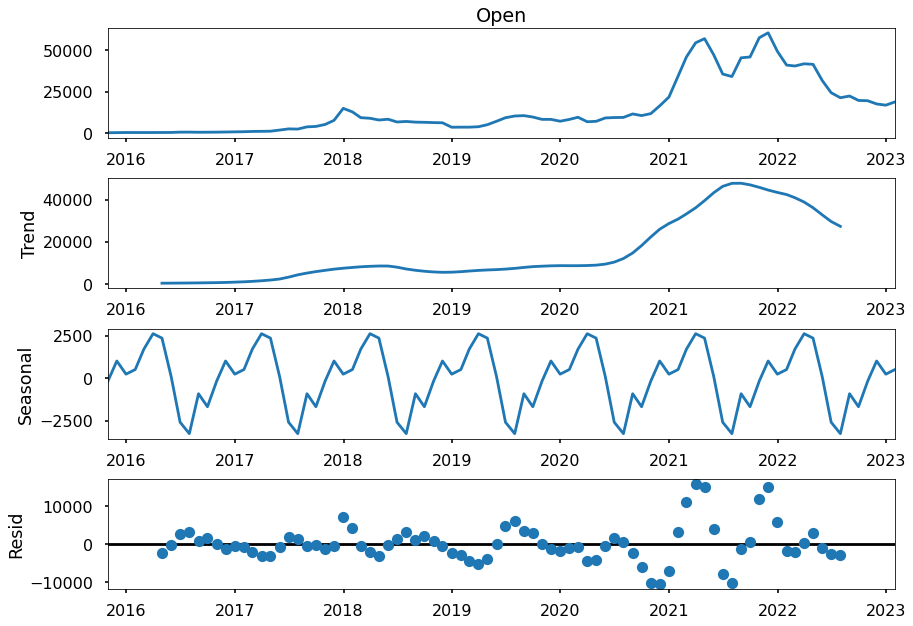

In [9]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Open).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Open)[1])
plt.show()

In [10]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Open)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Open)[1])

Dickey–Fuller test: p=0.490618


In [11]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.527233


Dickey–Fuller test: p=0.000702


<Figure size 1080x504 with 0 Axes>

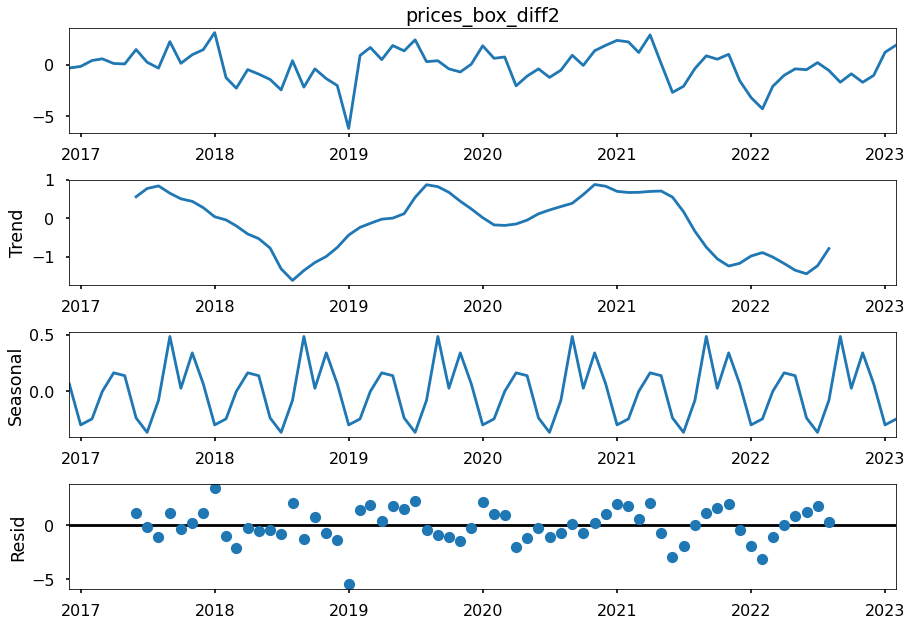

In [12]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

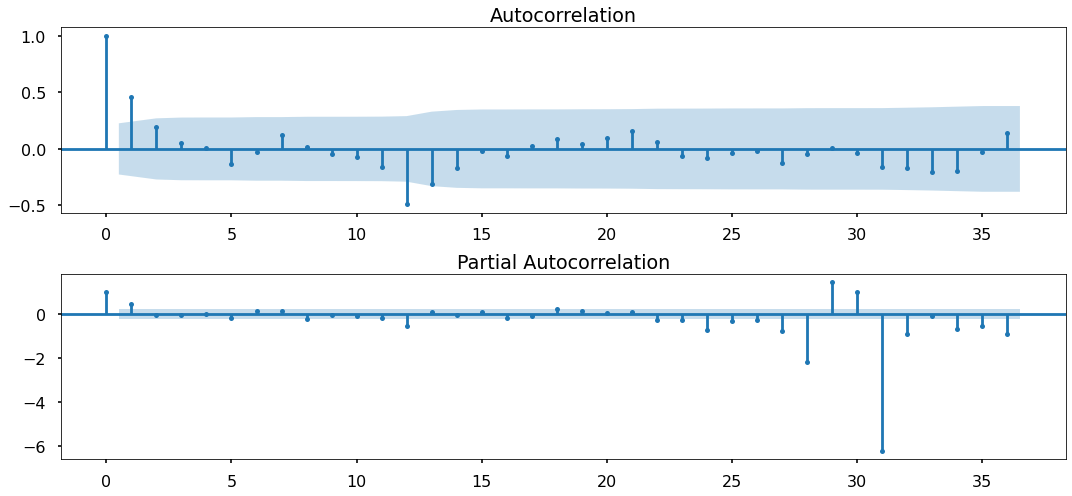

In [13]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=36, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=36, ax=ax)
plt.tight_layout()
plt.show()

In [14]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [15]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  244.167680
22  (1, 0, 2, 0)  245.179025
7   (0, 1, 0, 1)  245.365108
37  (2, 0, 0, 1)  245.801451
25  (1, 1, 0, 1)  245.837260
                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                   88
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -119.084
Date:                              Tue, 31 Jan 2023   AIC                            244.168
Time:                                      21:24:37   BIC                            251.120
Sample:                                  10-31-2015   HQIC                           246.944
                                       - 01-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Dickey–Fuller test:: p=0.000000


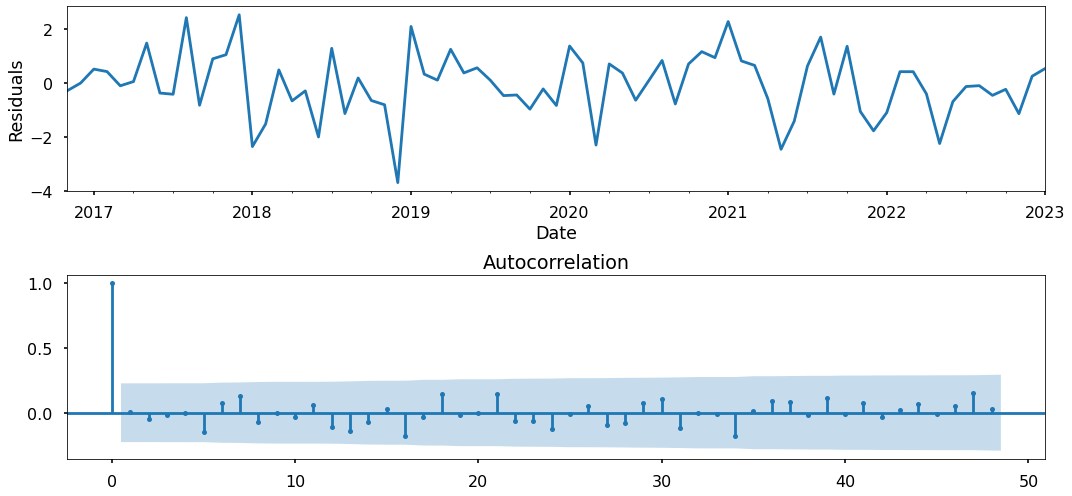

In [16]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [20]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))


In [21]:
df_month2 = df_month[['Open']]
df_month2

,Open
Date,
2015-10-31,274.028221
2015-11-30,350.054418
2015-12-31,423.096865
2016-01-31,411.429168
2016-02-29,401.872147
...,...
2022-09-30,19802.405457
2022-10-31,19627.840015
2022-11-30,17673.925555


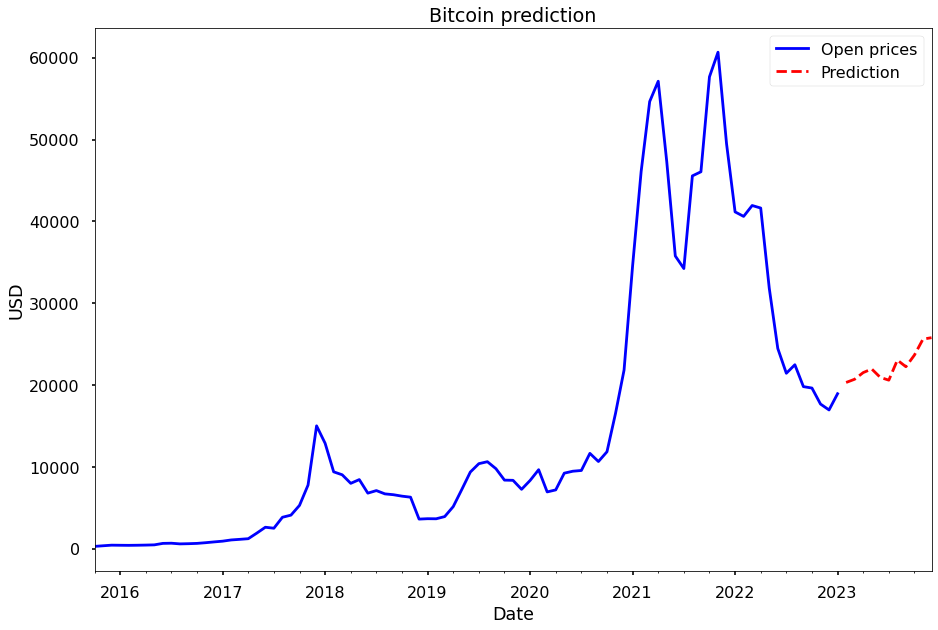

In [33]:
# Prediction
df_month2 = df_month[['Open']]
date_list = [datetime(2023, 2, 28),datetime(2023, 3, 31), datetime(2023, 4, 30), datetime(2023, 5, 31), 
             datetime(2023, 6, 30), datetime(2023, 7, 31), datetime(2023, 8, 31), datetime(2023, 9, 30),
             datetime(2023, 10,31), datetime(2023, 11,30), datetime(2023, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=125), lmbda)
df_month2
plt.figure(figsize=(15,10))
df_month2.Open.plot(color = 'b', label = 'Open prices')
df_month2.forecast.iloc[len(df_month.Open.values):].plot(color='r', ls='--', label='Prediction')
plt.legend()
plt.title('Bitcoin prediction')
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

,Open,Timestamp,High,Low,Close,Volume BTC,Volume USD,Weighted_Price_box,prices_box_diff,prices_box_diff2,forecast
2015-10-31,274.028221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2015-11-30,350.054418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.028732
2015-12-31,423.096865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.054777
2016-01-31,411.429168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423.097130
2016-02-29,401.872147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.429267
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23047.216770
2023-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22233.641429
2023-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23662.591053
2023-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25607.172512
